In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Gives all measurements
session.query(Measurement.date).order_by(Measurement.date).all()
#Gives measurements of last 12 months
session.query(Measurement.date).\
    filter(Measurement.date > '2016-12-31').\
    order_by(Measurement.date).all()

[('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'

In [12]:
#last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [13]:
import datetime as dt

# Calculate the date 1 year ago from the last data point in the database
# date 1 year ago from today
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
prcp_data

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [15]:
import pandas as pd

In [16]:
#Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(prcp_data).dropna()
df_prcp.head()
one_year = df_prcp[(df_prcp['date'] > '2016-08-23') & (df_prcp['date'] <= '2017-08-23')]
one_year
one_year_index = one_year.set_index('date')
one_year_index.head()


,station,prcp,tobs
date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-25,USC00519397,0.08,80.0
2016-08-26,USC00519397,0.00,79.0
2016-08-27,USC00519397,0.00,77.0
2016-08-28,USC00519397,0.01,78.0


In [17]:
one_year_sorted = one_year_index.sort_values('date')
one_year_sorted.head()

,station,prcp,tobs
date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-24,USC00519523,1.22,79.0
2016-08-24,USC00514830,2.28,80.0
2016-08-24,USC00516128,1.45,74.0
2016-08-24,USC00513117,2.15,76.0


In [18]:
one_year_sorted.columns


Index(['station', 'prcp', 'tobs'], dtype='object')

In [19]:
organied_yearly = one_year_sorted[['prcp']]
organied_yearly.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15


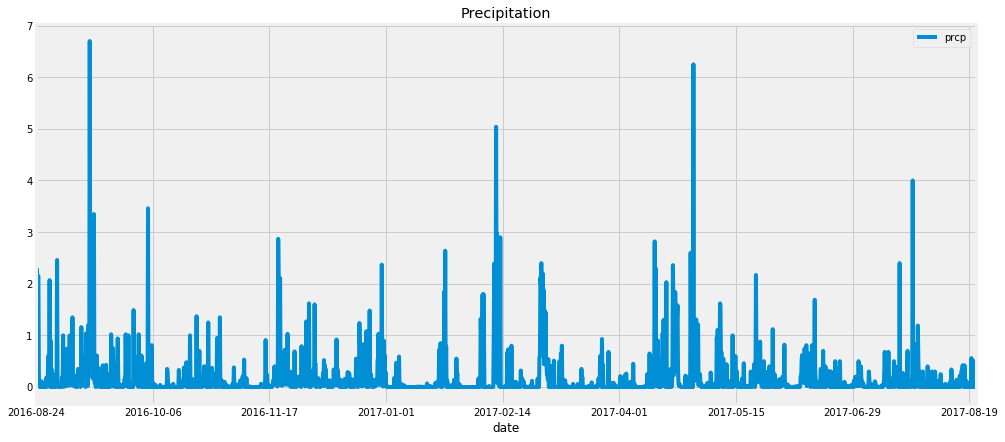

<Figure size 432x288 with 0 Axes>

In [20]:
organied_yearly.plot(label = 'prcp', figsize=(15,7))

plt.title('Precipitation')
plt.show()
plt.tight_layout()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
organied_yearly.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(Station.station).count()
station_data

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

active_stations

for active_station in active_stations:
    print(active_station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
low_temp = session.query(Measurement.station, func.min(Measurement.tobs)).all()

high_temp = session.query(Measurement.station, func.max(Measurement.tobs)).all()

avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).all()


Most_active_station = low_temp, high_temp, avg_temp 
Most_active_station

([('USC00511918', 53.0)],
 [('USC00519397', 87.0)],
 [('USC00519397', 73.09795396419437)])

In [26]:
# Choose the station with the highest number of temperature observations.


high_temp_station= session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()
high_temp_station



('USC00519281', 2772)

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogramhighest

last_twelve = session.query(Measurement.station, Measurement.date, Measurement.tobs,).\
        filter(Measurement.date >'2016-08-23').order_by(Measurement.station).all()
last_twelve



[('USC00513117', '2016-08-24', 76.0),
 ('USC00513117', '2016-08-25', 77.0),
 ('USC00513117', '2016-08-26', 78.0),
 ('USC00513117', '2016-08-27', 73.0),
 ('USC00513117', '2016-08-28', 73.0),
 ('USC00513117', '2016-08-29', 78.0),
 ('USC00513117', '2016-08-30', 76.0),
 ('USC00513117', '2016-08-31', 77.0),
 ('USC00513117', '2016-09-01', 79.0),
 ('USC00513117', '2016-09-02', 78.0),
 ('USC00513117', '2016-09-03', 77.0),
 ('USC00513117', '2016-09-04', 75.0),
 ('USC00513117', '2016-09-05', 78.0),
 ('USC00513117', '2016-09-06', 74.0),
 ('USC00513117', '2016-09-07', 75.0),
 ('USC00513117', '2016-09-08', 77.0),
 ('USC00513117', '2016-09-09', 76.0),
 ('USC00513117', '2016-09-10', 76.0),
 ('USC00513117', '2016-09-11', 76.0),
 ('USC00513117', '2016-09-12', 76.0),
 ('USC00513117', '2016-09-13', 76.0),
 ('USC00513117', '2016-09-14', 76.0),
 ('USC00513117', '2016-09-15', 78.0),
 ('USC00513117', '2016-09-16', 78.0),
 ('USC00513117', '2016-09-17', 78.0),
 ('USC00513117', '2016-09-18', 78.0),
 ('USC005131

In [32]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogramhighest
df = pd.DataFrame(last_twelve, columns=['Station', 'date', 'temp'])
df.set_index('Station', inplace=True)
df.head()



,date,temp
Station,,
USC00513117,2016-08-24,76.0
USC00513117,2016-08-25,77.0
USC00513117,2016-08-26,78.0
USC00513117,2016-08-27,73.0
USC00513117,2016-08-28,73.0


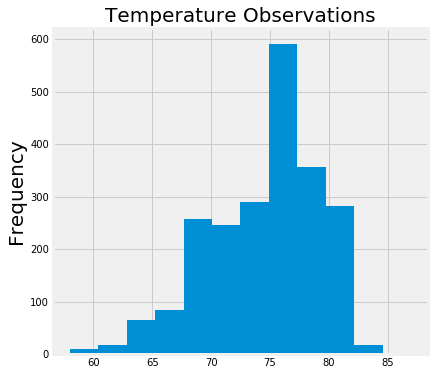

In [37]:
hist_plot = df['temp'].hist(bins=12, figsize=(6,6))
hist_plot.set_title('Temperature Observations', fontsize=20)
hist_plot.set_ylabel('Frequency', fontsize=20)
plt.show()

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


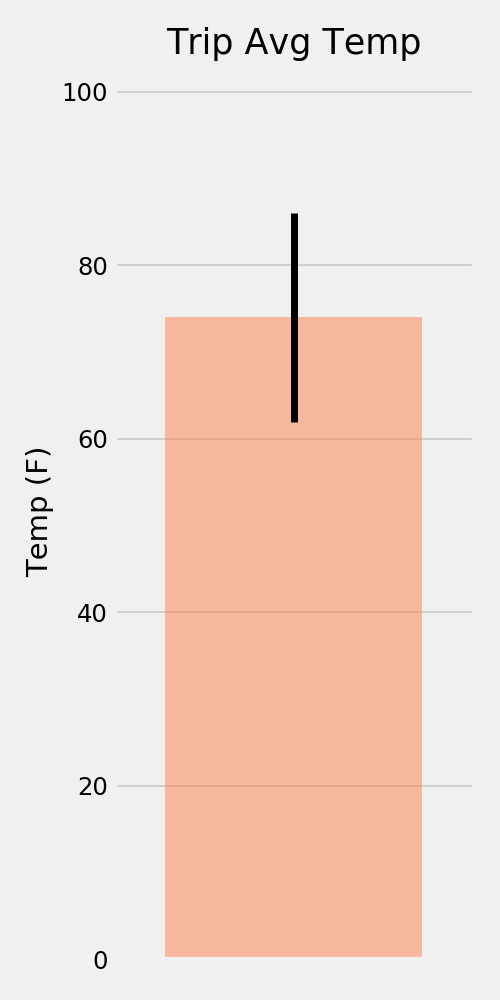

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


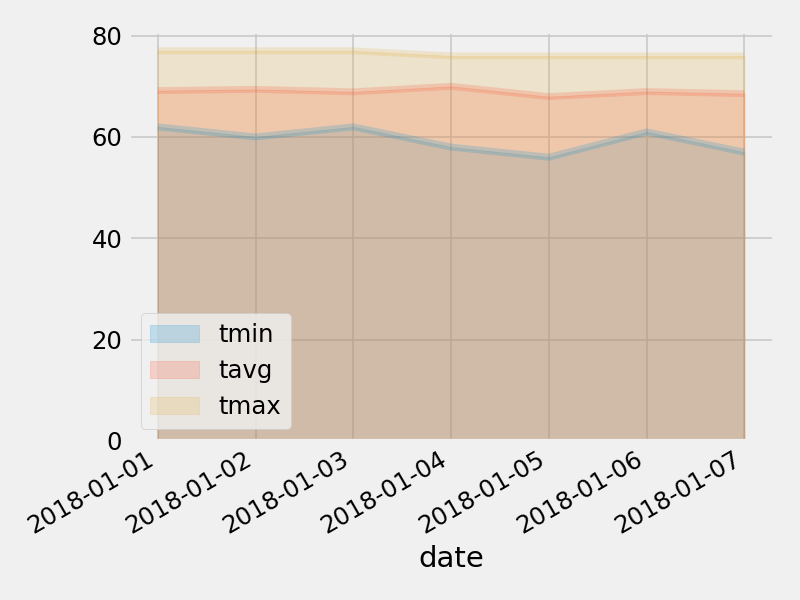

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
